# AN Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
load_config('inputs/an_Htilde.py')
conf['resman']=RESMAN()
conf['parman']=PARMAN()
conf['resman'].get_residuals(conf['parman'].par);

loading AN data sets 2003
multiprocess setup: ncpus=4 / observable


## Load AN data from files

In [3]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [4]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BRAHMS, Observerable: AN, Points: 18
Collaboration: STAR, Observerable: AN, Points: 42


## Plot results 
Plot the data vs. theory curves

In [5]:
data = {}

for key, value in conf['resman'].ANres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [6]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [7]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

In [8]:
def plotBRAHMS(data1,data2,label1='dataset 1'):

    data_sub1 = data1.query('xF > 0')
    data_sub2 = data2.query('xF > 0')
    
    plt.errorbar(data_sub1.xF, data_sub1.value, data_sub1.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
    plt.plot(data_sub1.xF, data_sub1.thy, linestyle='-', color='red')
    
    plt.errorbar(data_sub2.xF, data_sub2.value, data_sub2.alpha, 
                    marker='o', linestyle='', color='blue', label=label1)
    plt.plot(data_sub2.xF, data_sub2.thy, linestyle='-', color='blue')
    
    #plt.errorbar(data_sub3.xF, data_sub3.value, data_sub3.alpha, 
    #               marker='o', linestyle='', color='red', label=label3)
    #plt.plot(data_sub3.xF, data_sub3.thy, linestyle='-', color='red')
    
    #plt.errorbar(data_sub4.xF, data_sub4.value, data_sub4.alpha, 
    #                marker='o', linestyle='', color='blue', label=label1)
    #plt.plot(data_sub4.xF, data_sub4.thy, linestyle='-', color='blue')
    
    
    plt.xlim([0.1, 0.35])
    plt.xlabel('$x_F$')
    plt.title(label1,loc='left')
        
    plt.tight_layout()

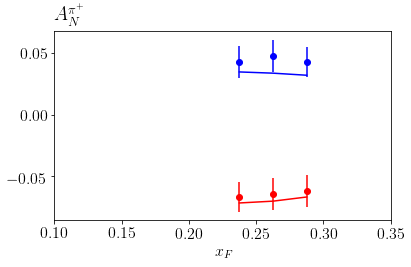

In [9]:
plotBRAHMS(data[1000],data[1002],'$A_{N}^{\pi^+}$')

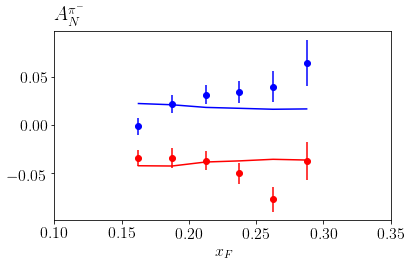

In [10]:
plotBRAHMS(data[1001],data[1003],'$A_{N}^{\pi^-}$')

In [11]:
def plotSTAR(data1,data2,data3,data4,label1='dataset 1'):

    data = [data1,data2,data3,data4]
    
    plt.figure(figsize=(10,10))
    
    for k in range(len(data)):
    
        plt.subplot(2, 2, k+1)
    
        data_sub = data[k].query('xF > 0')
    
        plt.errorbar(data_sub.xF, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        plt.plot(data_sub.xF, data_sub.thy, linestyle='-', color='red')
    
    
        plt.xlim([0.1, 0.8])
        plt.xlabel('$x_F$')
        plt.title(label1,loc='left')
        
    plt.tight_layout()

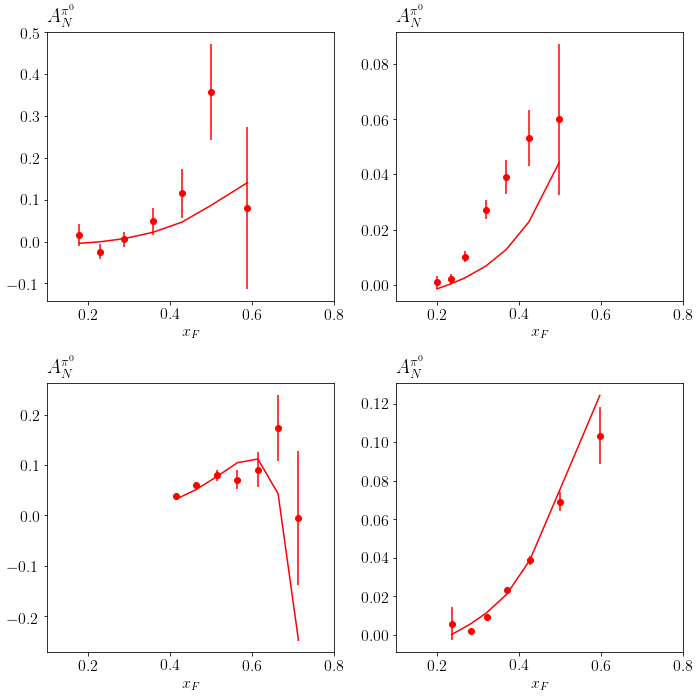

In [12]:
plotSTAR(data[2000],data[2001],data[2002],data[2003],'$A_{N}^{\pi^0}$')